# Practice Session 06: Network models


In this session we will learn to use [NetworkX](https://networkx.github.io/), a Python package, and we will write code to create random graphs and preferential attachment graphs.

**Note:** The graph generators we ask you to delive for this practice are already implemented in the NetworkX library and in other places online. *Do not copy those implementations:* they reproduce the same kinds of graph but follow a design that is different from what we describe here.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Your name here</font>

E-mail: <font color="blue">Your e-mail here</font>

Date: <font color="blue">The current date here</font>

# 1. Random (ER) graph generator

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

The following function, which you can leave as-is, will be useful. It returns `True` with probability *p*, and `False` with probability *1-p*:

In [ ]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

Write function `generate_random_graph(N, p)`, that:

1. Creates an empty graph
1. Adds N nodes to this graph, numbered from *0* to *N-1*
1. For each pair *(u,v)* of nodes:
   1. With probability *p*, adds an edge between *u* and *v*
1. Returns the graph

Small graphs can be easily created programmatically in Python with NetworkX.

* To create a graph, you use either `networkx.Graph` or `networkx.DiGraph`, which return an undirected an directed graph respectively.
* To add a node to a graph *g*, you use `g.add_node(u)`, where *u* is the name of the node.
* To add an edge to a graph *g*, you use `g.add_edge(u, v)`, where *u* is the name of the source of the edge, and *v* the name of the destination of the edge.

Example:

```python
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)
```

To generate all pairs of nodes, use:

```
for u, v in itertools.combinations(G.nodes, 2):
    ...
```

<font size="+1" color="red">Replace this cell with your code for *generate_random_graph(N,p)*,</font>

Write code to check whether your generator produces the correct number of edges. Generate *1000* graphs with a number of nodes *N=200* and connection probability *p* chosen by you, and keep track of the number of edges in the graph. Compare this visually against the number of expected edges.


<font size="+1" color="red">Replace this cell with your code to generate 1000 graphs and keep their number of edges in the array ``observed_edges``.</font>

The following compares visually the number of expected edges, which you should calculate as ``expected_edges``, with the number of actual edges.


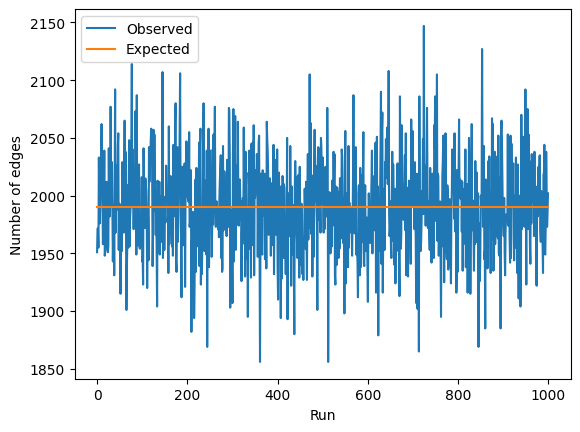

In [ ]:
# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

Create a new generator, `generate_random_graph_avg_degree(N, kavg)` that given a target number of nodes, and a target average degree, determines the appropriate value of `p` to call `generate_random_graph(N, p)`, using the formulas seen in class.


<font size="+1" color="red">Replace this cell with your code for ``generate_random_graph_avg_degree``.</font>

Test your new generator. First, write a function ``graph_average_degree`` that returns the average degree of a graph.

Then, generate a series of graphs with a number of nodes *N=500* of your choice and expected average degree between 0.0 and 3.0 in increments of 0.1. The observed average degree of the resulting graph should be close to the given average degree.


<font size="+1" color="red">Replace this cell with your code for ``graph_average_degree`` and for testing the generator.</font>

The following compares visually the given average degree with the observed average degree.


/var/folders/vj/k33cvvfx5qxgpkfpydx109w40000gn/T/ipykernel_26581/1970829798.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


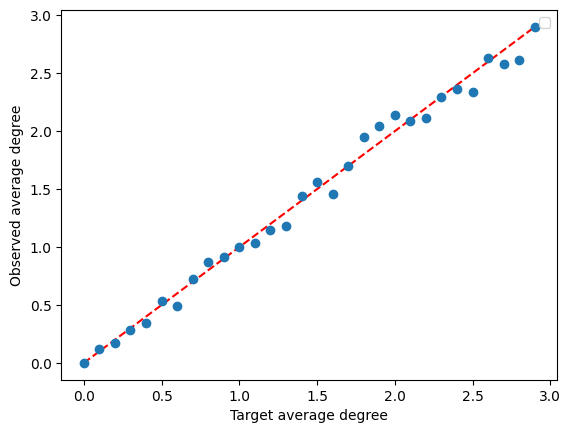

In [ ]:
# Leave as-is

#!! Be careful make sure to run the previous cell just before running this one as we will be using some of the variables later and it can cause issues

plt.xlabel("Target average degree")
plt.ylabel("Observed average degree")
plt.scatter(target_average_degrees, observed_average_degrees)
plt.plot([0,max(target_average_degrees)], [0,max(target_average_degrees)], 'r--', zorder= 0)
plt.legend()
plt.show()

## 1.2. Measure connectivity


Create a function `is_connected(g)` that given a graph, answers True if the graph is connected, False otherwise. Do not use the built-in `is_connected` function of NetworkX, but feel free to use the function `nx.has_path(g, source, target)`.

Use the `itertools.combinations(G.nodes, 2)` function described above.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code for *is_connected(g)*, include comments to explain what you are doing at each step.</font>

The following code, which you should leave as-is, returns the size of the largest connected component on a graph.


In [ ]:
# Leave as-is

def size_largest_cc(G):

    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])

    # Returns its number of nodes
    return G0.number_of_nodes()

Create a series of ER graphs having *N=1000* nodes and target average degree  between *0.2* and *2.0* (e.g. *0.2, ..., 2.0*) with step *0.05* . Record: (1) their observed average degrees and (2) the size of their largest connected component as a fraction of the total number of nodes.

You can use the following skeleton:

```python
N = 1000
target_average_degrees = np.arange(0.2, 2.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    average_degree = # YOUR CODE HERE
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = # YOUR CODE HERE
    largest_cc_sizes.append(largest_cc_size)
```

Then, create a scatter plot of *average_degrees* (x axis) and *largest_cc_sizes* (y axis). Remember to label the axes of your plot appropriately.


<font size="+1" color="red">Replace this cell with your code to generate the data for the plot.</font>

The following code shows this visually.


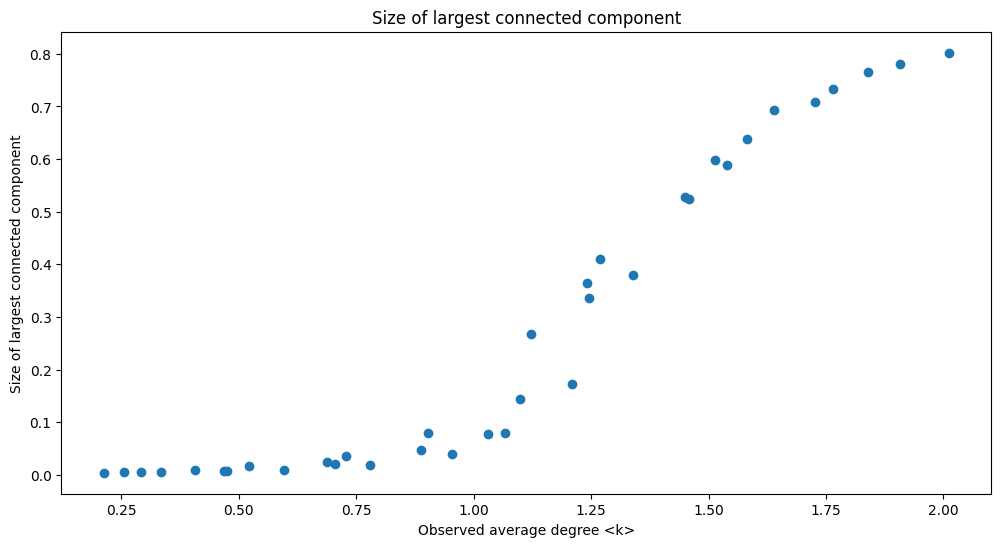

In [ ]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.scatter(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

<font size="+1" color="red">Answer the following questions. (1) At which average degree does the theory say that the size of the largest connected component should increase? (2) At which average degree does it increase in this particular case?

## 1.3. Degree distributions and Cumulative Degree Distributions

Create another function `print_er_statistics(g,p)` that given an ER graph and a probability *p* prints:

* its observed average degree *&lt;k&gt;*
* its expected average degree given *N* and *p*, using the formula seen in class

You can get a list of *(node, degree)* pairs by invoking `g.degree()`, or ask for the degree of node *u* using `g.degree(u)`.


<font size="+1" color="red">Replace this cell with your code for ``print_er_statistics``, and execute it over each of the three ER generated graphs with N=500 and p=[0.01, 0.03, 0.1]. </font>

You can use the following function (as-is, or modified) to plot the degree distribution in a graph.

In [ ]:
# Leave as-is or modify if you want
def plot_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        prob, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        plt.plot(bin_edges[:-1], prob, 'o-', label=f'p={p}')

    plt.title("Probability Density Function (Degree Distribution)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


def plot_cumulative_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        degree_counts, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        cumulative_distribution = np.cumsum(degree_counts[::-1])[::-1]

        plt.plot(bin_edges[:-1], cumulative_distribution, 'o-', label=f'p={p}')

    plt.title("Cumulative Degree Distribution (P(k' ≥ k))")
    plt.xlabel("Degree (k)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


<font size="+1" color="red">Replace this cell with the generation of four graphs with fixed *N* between 1500 and 3000, and different probabilities *p*. Start with a small probability *p* that yields a sparse graph, and increase it gradually. Not all graphs need to be connected. For these graphs use plot_degree_distributions and plot_cumulative_degree distributions.</font>

# 2. Preferential attachment (BA) generator

Write code for creating a BA graph.

The following function, `select_with_probability(x, m, p)` selects *m* elements from set *x* according to probabilities in *p*, without replacement. It uses [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) to do this.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [ ]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

The next cell, which you should leave as-is, tests this function.

In [ ]:
# LEAVE AS-IS

trials = 1500
vector = ['a', 'b', 'c']
probabilities = [0.75, 0.13, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)

for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1096 times, expected 1125
Element b was selected 225 times, expected 195
Element c was selected 179 times, expected 180


Write code for creating a BA graph.

Start by creating an auxiliary function, `select_targets(g, m)` that selects *m* target nodes in a graph *g*, with probabilities proportional to the degrees of the nodes.

```python
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected
´´´

<font size="+1" color="red">Replace this cell with your implementation of select_targets.</font>

Now, create a function `generate_preferential_attachment_graph(N, m0, m)` that:

1. Checks that *m <= m0* or raises a ValueError
1. Creates an empty graph
1. Adds nodes numbered from *0* to *m<sub>0</sub> - 1* to the graph
1. Creates a cycle by linking node *0* to node *1*, node *1* to node *2*, ..., node *m<sub>0</sub>-1* to node *0*
1. For every node *u* numbered from *m<sub>0</sub>* to *N - 1*
   1. Select *m* targets for this node using `select_targets`
   1. Add node *u* (remember to select targets **before** adding the node *u*)
   1. Link each node *u* to each of the *m* targets
1. Returns the graph

To test your code, you can do small experiments with, e.g., *N=100, m<sub>0</sub>=5, m=5* or *N=500, m<sub>0</sub>=2, m=1*, but do not include these small experimens with your deliverable.


<font size="+1" color="red">Replace this cell with your implementation of generate_preferential_attachment_graph(N, m0, m), include comments to explain what you are doing at each step.</font>

In [ ]:
# Leave as is
def estimate_alpha_mle(degrees, k_min=1):
    degrees = np.array(degrees)
    degrees = degrees[degrees >= k_min]
    n = len(degrees)
    alpha = 1 + n / np.sum(np.log(degrees / (k_min - 0.5)))
    return alpha

```python
def plot_degree_distribution_loglog(g, k_min=1):
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]
    
    # Compute empirical histogram
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence)+2),
        density=True
    )
    
    x = bin_edges[:-1]
    y = prob
    
    # Remove zeros (log scale)
    mask = y > 0
    x = x[mask]
    y = y[mask]
    
    # Estimate alpha using MLE
    # ONE LINE TO FILL:
    alpha=
    
    # Compute fitted power-law line
    # Normalize to match the first bin of the empirical data
    y_fit=
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
```

1. Complete plot_degree_distribution_log_log so that the resulting graph has the corresponding power-law fit.
2. Execute for two preferential attachment (BA) graphs with 5000 nodes, and values of *m0* and *m* (in the range 1-10)

Tip: To get a good fit you can use k_min=2*m .

<font size="+1" color="red">What is the expected value of alpha in an ideal BA network?</font>

# 3. ER and BA graph Comparison

In [ ]:
#Leave as is
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

To draw a graph, you can use:

```python
nx.draw_networkx(g)
```

You can have more control over the visualization of the graph, such as setting the figure size, removing the axis, using a particular layout algorithm, or changing the node size or color:

```python
plt.figure(figsize=(12,6))
plt.axis('off')
pos=nx.spring_layout(g)
nx.draw_networkx(g, pos, with_labels=True, node_size=500, node_color='lightgreen')
```

Tip: In the graph drawings of ER and BA graphs on this report you can use options `with_labels=False, node_size=10` (you can play with different values for `node_size`)

<font size="+1" color="red"> Generate an ER and a BA graph of size 300. Draw them and plot their degree distribution. Use p=0.02, m0=5 and m=1.</font>

<font size="+1" color="red">Give a very brief comment on the differences between the two graphs regarding:
1. Structure of the network.
2. The probability density function.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>